## Spam Folder Analysis

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
dataset = pd.read_csv("mail_data.csv")


In [61]:
dataset.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [62]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [63]:
dataset.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [64]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [65]:
dataset.duplicated().sum()

np.int64(415)

In [66]:
dataset.drop_duplicates(inplace=True)

## Preprocess the Data
### Rename columns and convert labels:

In [67]:
dataset['Category'].count()

np.int64(5157)

In [68]:
dataset.columns = ['label','message']

In [69]:
dataset['label']=dataset['label'].map({'ham':1,'spam':0})

In [70]:
X = dataset.iloc[:,-1].values
y = dataset.iloc[:,:-1].values

In [71]:
y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], shape=(5157, 1))

In [72]:
import re
import nltk
from nltk.corpus import stopwords

#  Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Cp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#  Custom Preprocessing Function with Lemmatization

In [73]:
lemmatizer = WordNetLemmatizer()
custom_words = set(stopwords.words('english')).union({'subject', 'regarding', 'please', 'thanks'})


def custom_preproccessor(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_words]
    return ' '.join(words)
    
X_cleaned = [custom_preproccessor(msg) for msg in X]

## Build and train pipeline

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer()
model = MultinomialNB()

X_vec = vectorizer.fit_transform(X_cleaned)
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model.fit(X_train_vec, y_train.ravel())


MultinomialNB()

# Evaluate

In [75]:

# prediction
y_pred = model.predict(X_test_vec)

#  Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)




✅ Accuracy: 0.9699612403100775


Spam vs ham

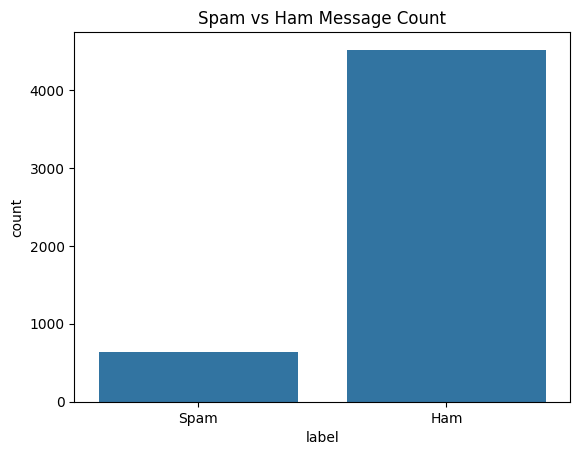

In [76]:
sns.countplot(x='label', data=dataset)
plt.xticks([0, 1], ['Spam', 'Ham'])
plt.title('Spam vs Ham Message Count')
plt.show()

## Confusion metrix

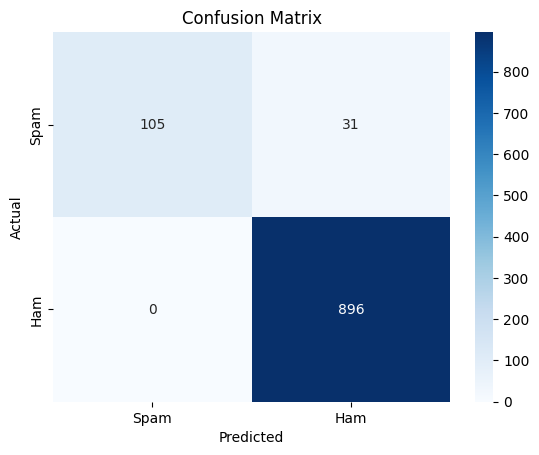

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()